# Rate Equations

Recall, a rate equation looks like this:
$$\frac{dy}{dt} = f(y,t).$$
* $y$ is the dependent variable and is a function of $t$, that is $y(t)$.
* $t$ is the independent variable. 
* $f(y,t)$ is some function of $y$ and $t$; that is, some formula written in terms of $y$ and possibly $t$.
    * We call this function the *rate* or the *right hand side function* (RHS).
    * In chemical engineering it can come from a mass balance, energy balance, or momentum balance
* There is also an initial condition $$y(0)=y_0.$$
* This is an example of an ordinary differential equation (ODE)



### Example Radioactive decay. 

$$\frac{dC}{dt} = -\frac{C}{\tau}.$$  
The exact solution is 
$$C(t) = C_0e^{-t/\tau},$$ 
where $C_0$ is the initial concentration.

### Preview: ```odeint```

* New function ```odeint```
* ```from scipy.integrate import odeint```
* Questions:
    * What arguments will this need?
    * What will it return?
    * Will you need to define a function and what form will it have?
    * What does the *solution* look like? (Like, what do you get as an *answer*?)
    * What were the things we needed/did in Excel?
* Try to solve the above ODE with $\tau=1$, $C_0=1$ and $t_{end}=5$.

#### Numerical Solution:

$$\frac{dC}{dt} = -\frac{C}{\tau}.$$  

1. define the function ```f(y,t)```
2. set the desired solution times ```t```
3. set the initial condition ```C0```
4. call ```odeint``` as ```C=odeint(f, C0, times)```
    * ```from scipy.integrate import odeint```
5. plot the results

Solve this problem with $\tau=1$, $C_0=1$, and t_end=5.

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate     import odeint

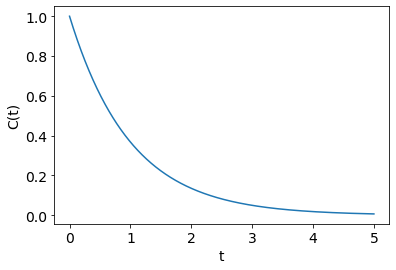

In [3]:
#------ Step 1, define the function

def rhsf(C, t, τ):
    return -C/τ

#------ Step 2, set times to get the solution at

t = np.linspace(0, 5, 1000)

#------ Step 3, set initial condition
 
C0 = 1

#------ Step 4, solve the problem

τ=1
C = odeint(rhsf, C0, t, args=(τ,))

#------ Step 5 plot the answer

plt.rc('font', size=14)
plt.plot(t,C)
plt.xlabel('t')
plt.ylabel('C(t)');

#------ Step 6: does the answer make sense? Analyse it.

### Exercise

Solve the rate equation for $v(t)$ at discrete points $t$ and plot the result:

$$\frac{dv}{dt} = g - cv^2.$$

* $g=9.81$, $c=1$.
* $v_0 = 0$.
* Solve to $t=2$.

Text(0, 0.5, 'v(t)')

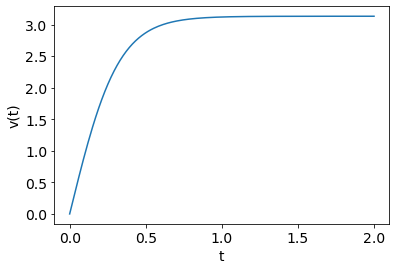

In [5]:
def rhsf(v, t):
    g = 9.81
    c = 1
    dvdt = g - c*v**2
    return dvdt

v0 = 0.0
t = np.linspace(0,2,200)
v = odeint(rhsf, v0, t)

plt.plot(t,v)
plt.xlabel('t')
plt.ylabel('v(t)')


## Multiple equations

What is we have multiple rate equations in multiple variables?

If we have multiple rate equations in multiple unknowns, we solve the problem in the same way, but using vector notation.
* This is similar to what we do for ```fsolve```.

### Example

Solve for the velocity of a falling object:
\begin{align}
\frac{dv}{dt} &= g - cv^2, \\
\frac{dx}{dt} &= v.
\end{align}

Here, g is gravitational acceleration, x is position, v is velocity, and c is a drag coefficient.



We first cast this in the form $$\frac{d\vec{y}}{dt} = \vec{f}(\vec{y},t).$$ 

This is equivalent to
\begin{align}
\frac{dy_0}{dt} &= f_0(y_0,y_1,t) \\
\frac{dy_1}{dt} &= f_1(y_0,y_1,t) 
\end{align}

For our example problem $v\equiv y_0$, $x\equiv y_1$, $g-cv^2=f_0(v,x,t)$, and $v=f_1(v,x,t)$

* Note, similiar to ```fsolve```:
    * Pass in an array of variables,
        * use a readable name, 
    * Recover variables from the array,
    * Compute each rate in terms of the variables,
    * Return an array of the rates.

#### Numerical solution 

\begin{align}
\frac{dv}{dt} &= g - cv^2, \\
\frac{dx}{dt} &= v.
\end{align}

* c = 1 m$^{-1}$
* g = 9.81 (m/s$^2$)
* t_end = 2 (s)
* $v_0 = 0$ (m/s)
* $x_0 = 0$ (m)

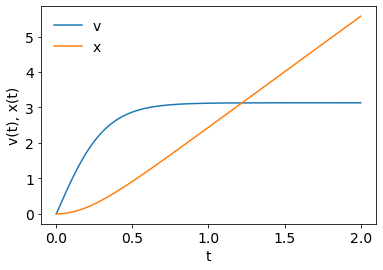

In [7]:
#------ Step 1, define the function

def rhsf(vx, t):
    v = vx[0]
    x = vx[1]
    
    g = 9.81
    c = 1
    
    dvdt = g - c*v*v
    dxdt = v
    
    return np.array([dvdt, dxdt])

#------ Step 2, set times to get the solution at

t = np.linspace(0,2,1001)

#------ Step 3, set initial condition

vx0 = np.array([0, 0])

#------ Step 4, solve the problem, recover v, x arrays

vx = odeint(rhsf, vx0, t)

#------ Step 5 plot the answer

plt.plot(t, vx[:,0], label='v')
plt.plot(t, vx[:,1], label='x')
plt.xlabel('t')
plt.ylabel('v(t), x(t)')
plt.legend(frameon=False);

#------ Step 6: does the answer make sense? Analyse it.


### Exercise

Solve the following rate equation for a coal particle in a furnace.
$$ \frac{dT}{dt} = \left(\frac{hA}{m c_p}(T_f - T) + \frac{\sigma A}{m c_p}(T_f^4-T^4)\right).$$

The initial particle temperature is $T_0=500$ K.

Use D=100 $\mu$m, tend = 0.05 s.

The following data is given:

| Variable | Value  | Units        |
|----------|--------|-------       |
| $\rho_p$ | 1000   | kg/m$^3$     |
| $c_p$    | 1380   | J/kg$\cdot$K |  
| $k$      | 0.1    | W/m$\cdot$K  |  
| $Nu$     | 2      | --           |  
| $\sigma$ | 5.67E-8| W/m$^2$K$^4$ |
| $T_f$    | 1500   | K            |

Also, the area, mass and Nusselt number $Nu$ are given, respectively, by:
$$ A = \pi D^2, $$
$$ m = \frac{\pi}{6}D^3\rho_p,$$
$$ Nu = \frac{hD}{k}.$$
